x1*exp(-x1**2 - x2**2)
[-2*x1**2*exp(-x1**2 - x2**2) + exp(-x1**2 - x2**2), -2*x1*x2*exp(-x1**2 - x2**2)]


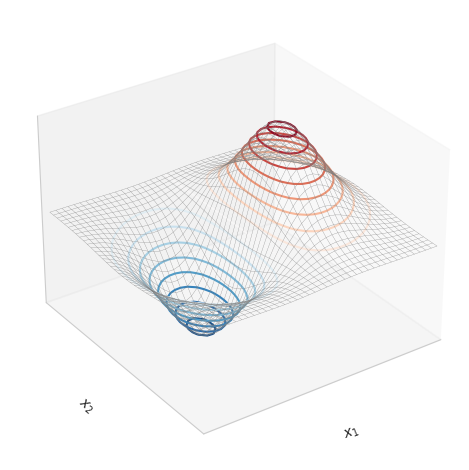

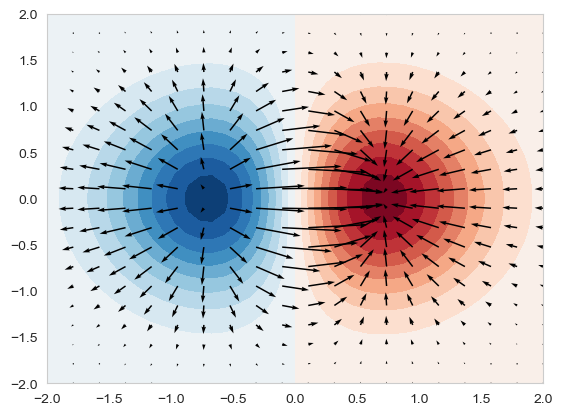

<Figure size 640x480 with 0 Axes>

In [1]:
# Bk4_Ch17_01.py

import sympy
import numpy as np
from sympy.functions import exp

#define symbolic vars, function
x1,x2 = sympy.symbols('x1 x2')
# 定义函数
f_x = x1*exp(-(x1**2 + x2**2))

print(f_x)

#take the gradient symbolically
# 求导
grad_f = [sympy.diff(f_x,var) for var in (x1,x2)]
print(grad_f)

# 转换为可调用的函数
f_x_fcn = sympy.lambdify([x1,x2],f_x)

#turn into a bivariate lambda for numpy
grad_fcn = sympy.lambdify([x1,x2],grad_f)

import matplotlib.pyplot as plt

xx1, xx2 = np.meshgrid(np.linspace(-2,2,40),np.linspace(-2,2,40))

# coarse mesh
# 生成坐标
xx1_, xx2_ = np.meshgrid(np.linspace(-2,2,20),np.linspace(-2,2,20))
# 计算导数
V = grad_fcn(xx1_,xx2_)
# 计算函数值
ff_x = f_x_fcn(xx1,xx2)

color_array = np.sqrt(V[0]**2 + V[1]**2)

# 3D visualization
ax = plt.figure().add_subplot(projection='3d')
ax.plot_wireframe(xx1, xx2, ff_x, rstride=1, 
                  cstride=1, color = [0.5,0.5,0.5],
                  linewidth = 0.2)
ax.contour3D(xx1, xx2, ff_x, 20, cmap = 'RdBu_r')

ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.zaxis.set_ticks([])
plt.xlim(-2,2)
plt.ylim(-2,2)
ax.view_init(30, -125)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_1,x_2)$')
plt.tight_layout()


# 2D visualization
fig, ax = plt.subplots()

plt.contourf(xx1, xx2, ff_x,20, cmap = 'RdBu_r')

plt.quiver (xx1_, xx2_, V[0], V[1],
            angles='xy', scale_units='xy',
            edgecolor='none', facecolor= 'k')

plt.show()
ax.set_aspect('equal')
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
plt.tight_layout()

x1*exp(-x1**2 - x2**2)
[-2*x1**2*exp(-x1**2 - x2**2) + exp(-x1**2 - x2**2), -2*x1*x2*exp(-x1**2 - x2**2)]


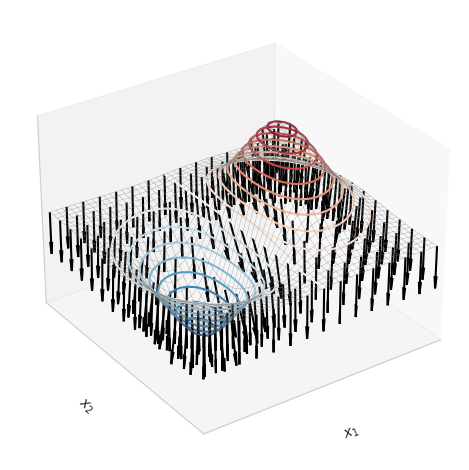

In [2]:
# Bk4_Ch17_02.py

import sympy
import numpy as np
from sympy.functions import exp

#define symbolic vars, function
x1,x2 = sympy.symbols('x1 x2')
# 定义函数
f_x = x1*exp(-(x1**2 + x2**2))

print(f_x)

#take the gradient symbolically
# 计算导数
grad_f = [sympy.diff(f_x,var) for var in (x1,x2)]
print(grad_f)
# 转换为可调用函数
f_x_fcn = sympy.lambdify([x1,x2],f_x)

#turn into a bivariate lambda for numpy
grad_fcn = sympy.lambdify([x1,x2],grad_f)

import matplotlib.pyplot as plt

xx1, xx2 = np.meshgrid(np.linspace(-2,2,40),np.linspace(-2,2,40))

# coarse mesh
xx1_, xx2_ = np.meshgrid(np.linspace(-2,2,15),np.linspace(-2,2,15))
V = grad_fcn(xx1_,xx2_)


ff_x = f_x_fcn(xx1,xx2)
ff_x_ = f_x_fcn(xx1_,xx2_)

color_array = np.sqrt(V[0]**2 + V[1]**2)

# 3D visualization + vectors
ax = plt.figure().add_subplot(projection='3d')
ax.plot_wireframe(xx1, xx2, ff_x, rstride=1, 
                  cstride=1, color = [0.5,0.5,0.5],
                  linewidth = 0.2)
ax.contour3D(xx1, xx2, ff_x, 20, cmap = 'RdBu_r')

lengths = np.sqrt(V[0]**2+V[1]**2+1**2)

for x1,y1,z1,u1,v1,w1,l in zip(xx1_.flatten(),
                               xx2_.flatten(),
                               ff_x_.flatten(),
                               V[0].flatten(), 
                               V[1].flatten(), 
                               V[0].flatten()*0 - 1,
                               lengths.flatten()):
    
    ax.quiver(x1, y1, z1, u1, v1, w1, length=l*0.2,
              color = 'k')

ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.zaxis.set_ticks([])
plt.xlim(-2,2)
plt.ylim(-2,2)
ax.view_init(30, -125)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_1,x_2)$')

plt.tight_layout()

-4*x1**2 - 4*x2**2
[-8*p1, -8*p2]
Matrix([[-4*p1**2 - 8*p1*(-p1 + x1) - 4*p2**2 - 8*p2*(-p2 + x2)]])


Text(0.5, 0, '$f(x_1,x_2)$')

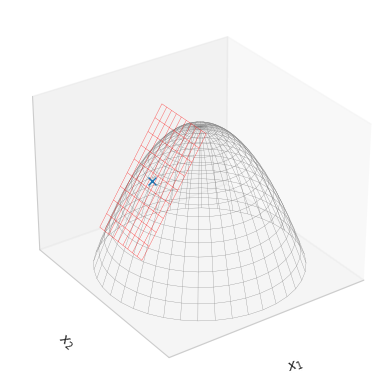

In [6]:
# Bk4_Ch17_03.py

import sympy
from sympy import Matrix, Transpose
import numpy as np
from sympy.functions import exp
import matplotlib.pyplot as plt


# 生成坐标位置
def mesh_circ(c1, c2, r, num):
    
    theta = np.arange(0,2*np.pi+np.pi/num,np.pi/num)
    r     = np.arange(0,r,r/num)
    theta,r = np.meshgrid(theta,r)
    xx1 = np.cos(theta)*r + c1
    xx2 = np.sin(theta)*r + c2
    
    return xx1, xx2


#define symbolic vars, function
x1,x2,p1,p2 = sympy.symbols('x1 x2 p1 p2')

f_x = -4*x1**2 -4*x2**2
f_p = -4*p1**2 -4*p2**2

print(f_x)

#take the gradient symbolically
# 计算导数
grad_f = [sympy.diff(f_p,var) for var in (p1,p2)]
print(grad_f)
# 转换为可调用函数
f_x_fcn = sympy.lambdify([x1,x2],f_x)
# 切平面
t_x = Matrix(grad_f).T*Matrix([[x1 - p1], [x2 - p2]]) + Matrix([f_p])
print(t_x)

t_x_fcn = sympy.lambdify([x1,x2,p1,p2],t_x)

#turn into a bivariate lambda for numpy
grad_fcn = sympy.lambdify([x1,x2],grad_f)

xx1, xx2 = mesh_circ(0, 0, 3, 20)

# expansion point
p1 = -1.5
p2 = 0
py = f_x_fcn(p1,p2)

# coarse mesh
xx1_, xx2_ = np.meshgrid(np.linspace(p1-1, p1+1, 10),
                         np.linspace(p2-1, p2+1, 10))

# quadratic surface
# 计算函数值
ff_x = f_x_fcn(xx1,xx2)

# tangent plane
# 切平面
tt_x = t_x_fcn(xx1_, xx2_, p1, p2)

# 3D visualization
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_wireframe(xx1, xx2, ff_x, rstride=1, 
                  cstride=1, color = [0.5,0.5,0.5],
                  linewidth = 0.2)

ax.plot_wireframe(xx1_, xx2_, np.squeeze(tt_x), rstride=1, 
                  cstride=1, color = [1,0,0],
                  linewidth = 0.2)
# 标记切点
ax.plot(p1,p2,py,'x')

ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.zaxis.set_ticks([])
plt.xlim(-3,3)
plt.ylim(-3,3)
ax.view_init(30, -125)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_1,x_2)$')